# Ceneo Analyzer

## Bibliioteki


In [44]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Lista kodów produktów o których zostały pobrane opinie

In [45]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep = "\n")

114700014
39562616


## Kod produktu którego opinie mają zostać przeanalizowane

In [46]:
product_id = input("Proszę podać kod produktu z serwisu Ceneo.pl: ")

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [47]:
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",","."), ).astype(float)
opinions.recommendation = opinions.recommendation.apply(lambda r: "Brak rekomendacji" if r is None else r)

In [48]:
opinions

,opinion_id,author,recommendation,rating,content,pros,cons,useful,useless,post_date,purchase_date
0,3422858,Użytkownik Ceneo,Polecam,5.0,"UWAGA, UWAGA do wszystkich zgłaszających probl...",[],[],57,7,2015-11-17 17:55:59,None
1,3529254,Marcin,Polecam,4.5,"Ogólnie spoko, chociaż telefon po wyjęciu z pu...",[],[przycisk home - trzeba mocno naciskać],3,0,2016-01-13 00:44:40,2015-12-27 14:12:05
2,6706897,zedi,Polecam,4.0,Wady Słaby dźwięk z głośnika głównego - z tyłu...,"[ekran nie do zbicia, wyświetlacza: design: ...","[bateria lądująca w godzine 100%, czas pracy n...",0,2,2018-03-14 00:45:39,None
3,3580458,Janek,Polecam,5.0,Smartphone szybki i stabilny. Super ekran doty...,[wyświetlacza: design: żywotność],[],37,16,2016-02-12 11:13:47,2016-01-25 12:30:40
4,3287614,maciej,Polecam,4.0,"Generalnie bardzo dobry smartfon, moim zdaniem...",[funkcjonalność],[],35,14,2015-08-21 14:25:23,None
...,...,...,...,...,...,...,...,...,...,...,...
127,3502307,Użytkownik Ceneo,Polecam,5.0,"5,0/5",[],[],0,0,2015-12-29 18:45:09,None
128,3455136,Użytkownik Ceneo,Polecam,5.0,"5,0/5",[],[],0,0,2015-12-04 22:52:58,None
129,3442558,Użytkownik Ceneo,Polecam,5.0,"5,0/5",[],[],0,0,2015-11-27 13:16:18,None
130,3430751,Użytkownik Ceneo,Polecam,5.0,"5,0/5",[],[],0,0,2015-11-21 13:41:11,None


## Podstawowe statystyki zbioru opinii

In [49]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.apply(lambda p: 1 if p else 0).sum()
cons_count = opinions.cons.apply(lambda c: 1 if c else 0).sum()
average_rating = opinions.rating.mean()

### Histogram częstości poszczególnych ocen produktu

In [50]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5), fill_value = 0)
rating_distribution

rating
0.0     0
0.5     3
1.0     1
1.5     2
2.0     1
2.5     0
3.0     5
3.5     3
4.0    19
4.5    19
5.0    79
Name: count, dtype: int64

[Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '79')]

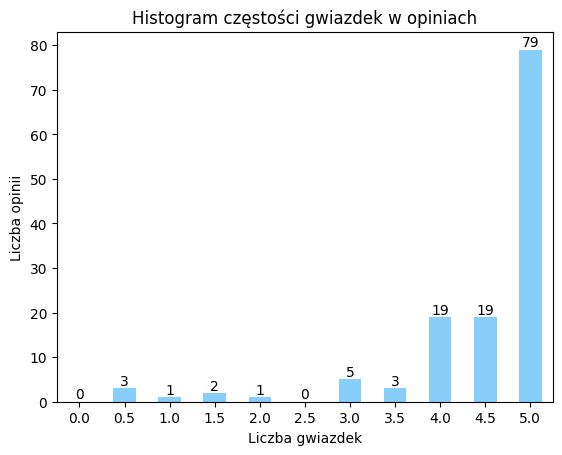

In [51]:
fig, ax = plt.subplots()
rating_distribution.plot.bar(color = "lightskyblue")
plt.title("Histogram częstości gwiazdek w opiniach")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0], label_type='edge')

### Udział poszczególnych rekomendacji w opiniach o produkcie

In [52]:
recommendations_distribution = opinions.recommendation.value_counts().reindex(["Polecam", "Nie polecam", "Brak rekomendacji"])
recommendations_distribution

recommendation
Polecam              114
Nie polecam            7
Brak rekomendacji     11
Name: count, dtype: int64

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

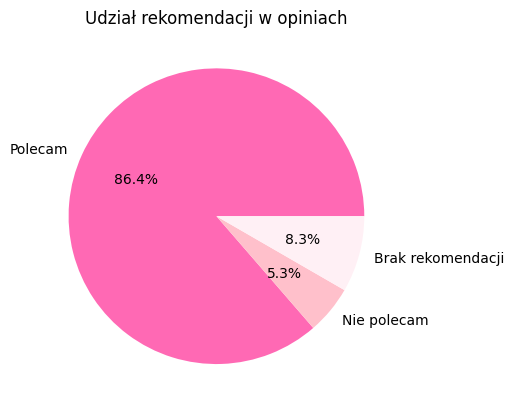

In [53]:
recommendations_distribution.plot.pie(
    colors = ["hotpink", "pink",  "lavenderblush"],
    autopct = "%1.1f%%",
    label = ""
)
plt.title("Udział rekomendacji w opiniach")